# Sentiment Analysis of Coldplay Lyrics

**Sentiment analysis**, or opinion mining, is an NLP technique used to determine the emotional tone of text. In analyzing Coldplay lyrics, it involves:

#### Objective
- Identify and quantify the emotional content, categorizing the sentiment of each song as positive, negative, or neutral.

#### Process
1. **Text Preprocessing**: Clean lyrics by removing noise, handling contractions, and normalizing text.
2. **Tokenization**: Break down the lyrics into individual words or tokens.
3. **Sentiment Scoring**: Use pre-trained models (e.g., VADER, DistilBERT) to assign sentiment scores to each lyric.
4. **Classification**: Categorize each song's sentiment based on the scores.

#### Methodology

- Convert to lowercase
- Remove punctuation and special characters
- crate custom stop-words list
- Tokenize the lyrics removing stop-words
- ***Add Part of Speech to token touples***
- Lemmatize tokens to perserve Part of Speech meaning >> via nltk,stem WordNetLemmatizer
- Handling negation (VADER has built in support)
- use lexicon-based sentiment analysis tools >> via TextBlob or VADER
- compute sentiment polarity for each song
- classify sentiment


## Load the Dataset

In [1]:
# load data analysis libraries
import pandas as pd
import numpy as np
import re #regular expressions

In [2]:
#load the dataset
df = pd.read_excel("Coldplay Research Project_Data.xlsx")
df.head()

,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought..."
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How..."
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...


## Preprocessing

1. Convert to lowercase, expand contractions, and remove punctuation.
2. Tokenize.
3. Edit stop-words and remove them from tokens.
4. Lemmatization.

In [3]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# expand contractions, e.g. you're --> you are
# Function to expand contractions
def expand_contractions(text):
    contractions = {
        "n't": " not",
        "'ve": " have",
        "'m": " am",
        "'ll": " will",
        "'d": " would",
        "'re": " are",
        "'s": " is"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text

# Function to preprocess lyrics
def preprocess_lyrics(lyrics):
    # Convert to lowercase
    lyrics = lyrics.lower()
    
    # Expand contractions
    lyrics = expand_contractions(lyrics)
    
    # Remove punctuation and special characters
    lyrics = re.sub(r'[^\w\s]', '', lyrics)
    
    # Tokenize
    tokens = word_tokenize(lyrics)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    custom_stop_words = set(["oh", "ooh", "woo", "ol", "la", "hmm", "ah", "na", "para", "hoo"])  # Add any custom stop words
    stop_words = stop_words.union(custom_stop_words)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


In [6]:
# Apply preprocessing to lyrics column
df['Processed_Lyrics'] = df['Lyrics'].apply(preprocess_lyrics)

# Display the first few rows to verify preprocessing
df[['Lyrics', 'Processed_Lyrics']].head(10)

,Lyrics,Processed_Lyrics
0,"Bones, sinking like stones\nAll that we fought...",bone sinking like stone fought home place grow...
1,So I look in your direction\nBut you pay me no...,look direction pay attention know listen cause...
2,"I awake to find no peace of mind\nI said, ""How...",awake find peace mind said live fugitive see c...
3,Did I drive you away?\nI know what you'll say\...,drive away know say say sing one know promise ...
4,Look at the stars\nLook how they shine for you...,look star look shine everything yeah yellow ca...
5,"Oh no, I see\nA spider web is tangled up with ...",see spider web tangled lost head thought stupi...
6,"In a haze, a stormy haze\nI'll be 'round, I'll...",haze stormy haze round loving always always ta...
7,Can anybody fly this thing\n♪\nBefore my head ...,anybody fly thing head explodes head start rin...
8,I want to live life and never be cruel\nAnd I ...,want live life never cruel want live life good...
9,When I counted up my demons\nSaw there was one...,counted demon saw one every day good one shoul...


## Lexicon Based Sentimeny Analysis (LBSA) with VADER

In [7]:
#import VADER package for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Sentiment Polarity

In [8]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores / polarity
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to processed lyrics
df['sentiment_scores'] = df['Processed_Lyrics'].apply(get_sentiment_scores)

df[['Lyrics', 'sentiment_scores']].head(10)

,Lyrics,sentiment_scores
0,"Bones, sinking like stones\nAll that we fought...","{'neg': 0.076, 'neu': 0.435, 'pos': 0.489, 'co..."
1,So I look in your direction\nBut you pay me no...,"{'neg': 0.051, 'neu': 0.627, 'pos': 0.322, 'co..."
2,"I awake to find no peace of mind\nI said, ""How...","{'neg': 0.19, 'neu': 0.666, 'pos': 0.143, 'com..."
3,Did I drive you away?\nI know what you'll say\...,"{'neg': 0.093, 'neu': 0.39, 'pos': 0.517, 'com..."
4,Look at the stars\nLook how they shine for you...,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp..."
5,"Oh no, I see\nA spider web is tangled up with ...","{'neg': 0.212, 'neu': 0.609, 'pos': 0.179, 'co..."
6,"In a haze, a stormy haze\nI'll be 'round, I'll...","{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp..."
7,Can anybody fly this thing\n♪\nBefore my head ...,"{'neg': 0.032, 'neu': 0.681, 'pos': 0.287, 'co..."
8,I want to live life and never be cruel\nAnd I ...,"{'neg': 0.08, 'neu': 0.507, 'pos': 0.413, 'com..."
9,When I counted up my demons\nSaw there was one...,"{'neg': 0.245, 'neu': 0.422, 'pos': 0.333, 'co..."


In [9]:
# Expand sentiment scores
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

#normalize compound scores
df['compound'] = (df['compound'] + 1) / 2
#TODO normalize the other scores and rename to vader_score
df[['#','negative', 'positive', 'neutral', 'compound']].head()

,#,negative,positive,neutral,compound
0,1,0.076,0.489,0.435,0.99365
1,2,0.051,0.322,0.627,0.99275
2,3,0.190,0.143,0.666,0.22885
3,4,0.093,0.517,0.390,0.98450
4,5,0.000,0.274,0.726,0.98830


### Classify Sentiment

In [10]:
# Function to classify sentiment based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.525:
        return 'Positive'
    elif compound_score <= 0.475:
        return 'Negative'
    else:
        return 'Neutral'

# Classify sentiment
df['sentiment_category'] = df['compound'].apply(classify_sentiment)

df[["#", "sentiment_category"]].head(10)

,#,sentiment_category
0,1,Positive
1,2,Positive
2,3,Negative
3,4,Positive
4,5,Positive
5,6,Negative
6,7,Positive
7,8,Positive
8,9,Positive
9,10,Positive


### Results

In [11]:
#preview of sentiment results
df[['Lyrics', 'Processed_Lyrics', 'compound', 'sentiment_category']].head()

,Lyrics,Processed_Lyrics,compound,sentiment_category
0,"Bones, sinking like stones\nAll that we fought...",bone sinking like stone fought home place grow...,0.99365,Positive
1,So I look in your direction\nBut you pay me no...,look direction pay attention know listen cause...,0.99275,Positive
2,"I awake to find no peace of mind\nI said, ""How...",awake find peace mind said live fugitive see c...,0.22885,Negative
3,Did I drive you away?\nI know what you'll say\...,drive away know say say sing one know promise ...,0.98450,Positive
4,Look at the stars\nLook how they shine for you...,look star look shine everything yeah yellow ca...,0.98830,Positive


In [12]:
# Basic statistics
print("\nOverall Sentiment Distribution:")
print(df['sentiment_category'].value_counts(normalize=True))

print("\nAverage Compound Score:", df['compound'].mean())


Overall Sentiment Distribution:
sentiment_category
Positive    0.679245
Negative    0.245283
Neutral     0.075472
Name: proportion, dtype: float64

Average Compound Score: 0.6825665094339621


In [13]:
#descriptive statistics for compound scores.
df['compound'].describe()

count    106.000000
mean       0.682567
std        0.360305
min        0.001600
25%        0.500000
50%        0.897725
75%        0.986675
max        0.999850
Name: compound, dtype: float64

### Visual Results

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Sentiment Distribution for LBSA

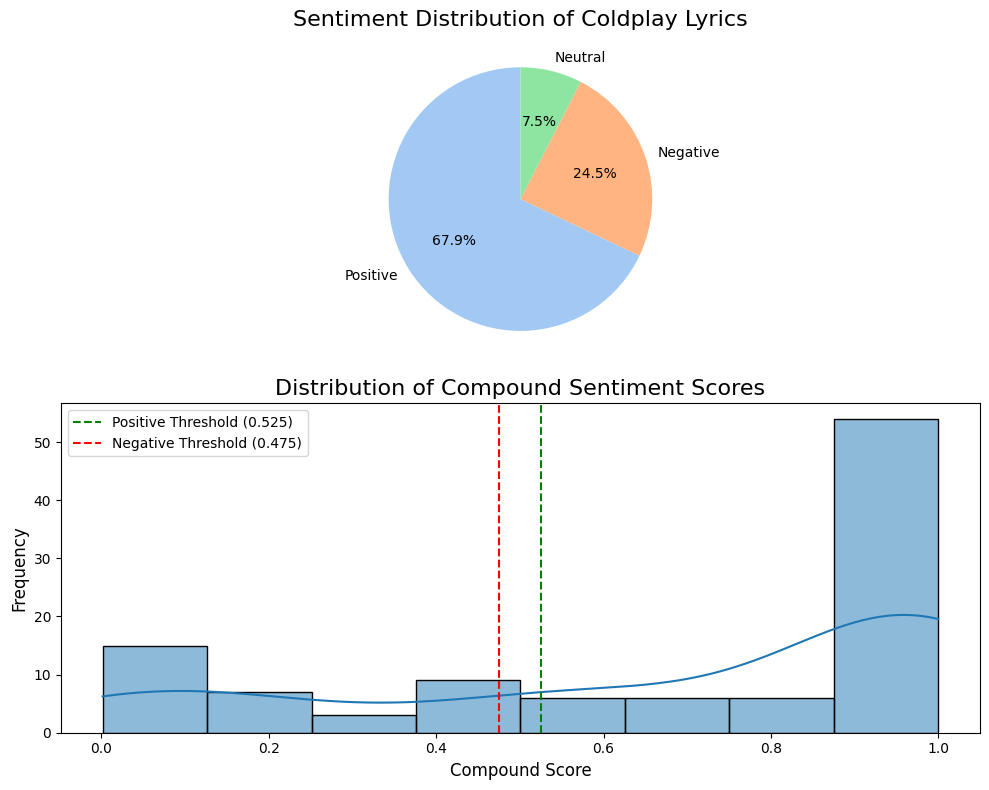

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 1. Sentiment Distribution (Pie Chart)
sentiment_counts = df['sentiment_category'].value_counts()
colors = sns.color_palette('pastel')[0:3]
ax1.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sentiment Distribution of Coldplay Lyrics', fontsize=16)

# 2. Compound Score Distribution (Histogram)
sns.histplot(df['compound'], kde=True, ax=ax2)
ax2.set_title('Distribution of Compound Sentiment Scores', fontsize=16)
ax2.set_xlabel('Compound Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

# Add vertical lines for sentiment thresholds
positive_threshold = 0.525
negative_threshold = 0.475
ax2.axvline(x=positive_threshold, color='g', linestyle='--', label='Positive Threshold (0.525)')
ax2.axvline(x=negative_threshold, color='r', linestyle='--', label='Negative Threshold (0.475)')
ax2.legend()

# Adjust layout and save the figure
plt.tight_layout()



#### Mean Sentiment by Album

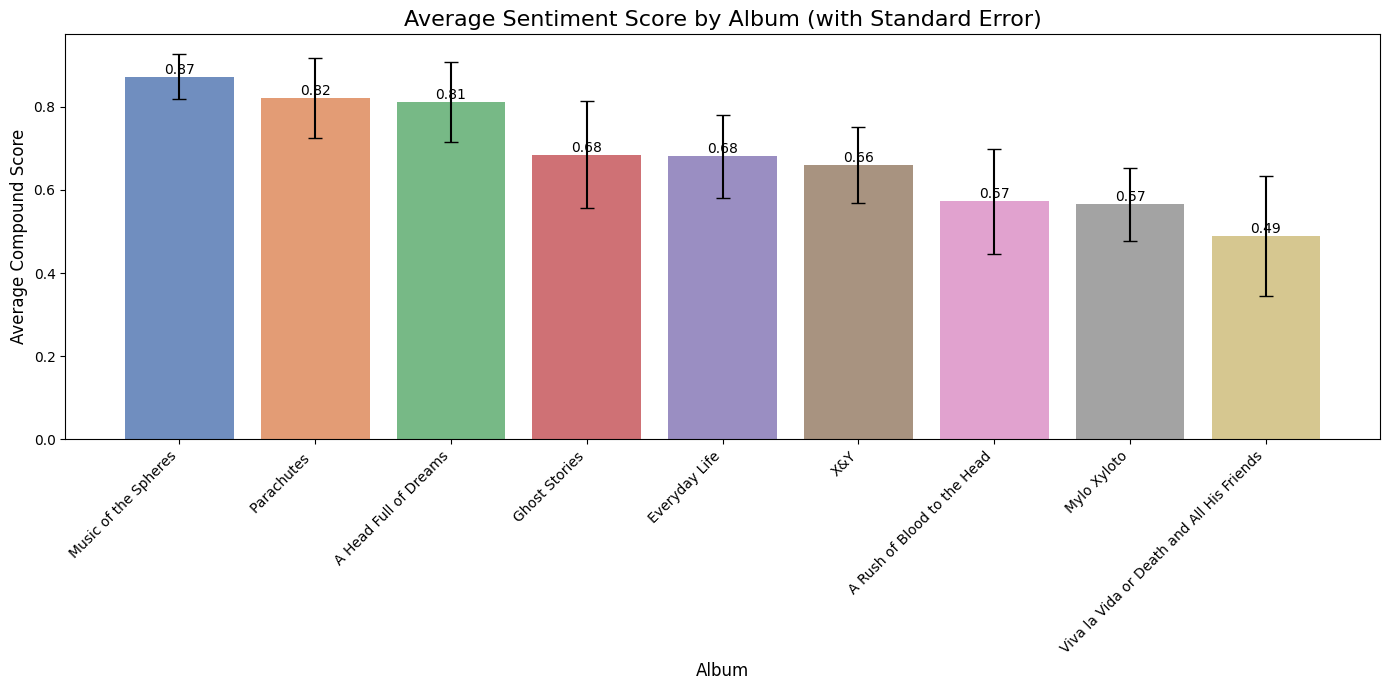

In [16]:
# Calculate mean and standard error for each album
album_stats = df.groupby('Album Name')['compound'].agg(['mean', 'sem']).reset_index()
album_stats = album_stats.sort_values('mean', ascending=False)

plt.figure(figsize=(14, 7))
    
# Create bar plot
bars = plt.bar(album_stats['Album Name'], album_stats['mean'], yerr=album_stats['sem'], 
                   capsize=5, alpha=0.8, color=sns.color_palette("deep"))

plt.title('Average Sentiment Score by Album (with Standard Error)', fontsize=16)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Average Compound Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

    
# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                 ha='center', va='bottom')
    
# Adjust layout to prevent cutting off labels
plt.tight_layout()
    
    

#### Mean Sentiment by Album over time

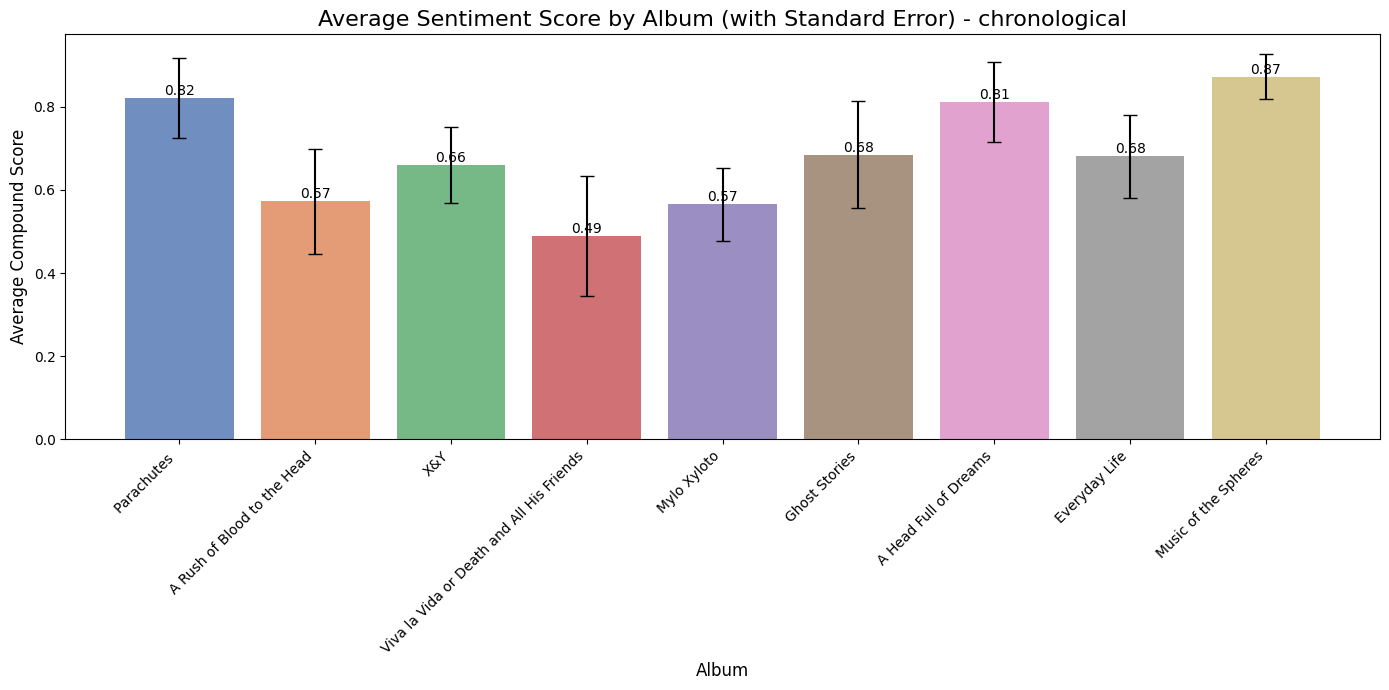

In [17]:
# Calculate mean and standard error for each album
album_stats = df.groupby(['Album Name', 'Album Release Date'])['compound'].agg(['mean', 'sem']).reset_index()

# Sort by album release date
album_stats = album_stats.sort_values('Album Release Date')

plt.figure(figsize=(14, 7))
    
# Create bar plot
bars = plt.bar(album_stats['Album Name'], album_stats['mean'], yerr=album_stats['sem'], 
                   capsize=5, alpha=0.8, color=sns.color_palette("deep"))

plt.title('Average Sentiment Score by Album (with Standard Error) - chronological', fontsize=16)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Average Compound Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

    
# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                 ha='center', va='bottom')
    
# Adjust layout to prevent cutting off labels
plt.tight_layout()

### Conclusions and Summary for LBSA

- The **Mean** normalized compound score is *0.68*, suggesting that Coldplay lyrics are *slightly positive*.
- **Standard deviation** is *0.36*, suggesting **high variability** in sentiment polarity and **notable diversity in the emotional tone of Coldplay music**.
- **Only 25%** percent of tracks have **negative** normalized sentiment.
- **Half** of the tracks have a normalized compound score **higher than approx 0.90**.
- The **sentiment distribution** is **skewed towards positive sentiment**. 
- The album *"Music of the Spheres"* has the **highest average sentiment score**.
- *"Viva la Vida or Death and All His Friends"* has the **lowest (almost neutral, ncs = 0.49) sentiment score**, indicating it is perceived with mixed or neutral sentiment possibly due to emotion diversity between individual tracks.

### Limitations of Lexicon-Based Sentiment Analysis

1. **Context Ignorance**: Misses context-specific sentiment.
2. **Negation Handling**: Struggles with negations (e.g., "not happy").
3. **Sarcasm and Irony**: Difficult to detect sarcasm and irony.
4. **Polysemy and Homonymy**: Confusion with words having multiple meanings.
5. **Fixed Vocabulary**: Misses slang, new phrases, and unique expressions.
6. **Intensity and Modifier Handling**: Poor handling of sentiment intensity modifiers.
7. **Cultural and Temporal Sensitivity**: Overlooks cultural and temporal language variations.
8. **Lyrics Structure**: Ignores structural and rhythmic elements of songs.
9. **Idiomatic Expressions**: Misinterprets idioms and fixed expressions.
10. **Sentiment Flow**: Fails to capture the emotional arc throughout the song.


## Alternative Approaches to Analyzing Sentiment of Coldplay Lyrics

1. **Machine Learning-Based Analysis**:
    - Supervised Learning (e.g., SVM, Naive Bayes, LSTM, BERT)
    - Unsupervised Learning (e.g., clustering, LDA)

2. **Hybrid Methods**:
    - Combine lexicon-based and machine learning approaches

3. **Aspect-Based Sentiment Analysis (ABSA)**:
    - Analyze specific themes/aspects separately (e.g. love, loss, hope)

4. **Deep Learning and Neural Networks**:
    - Use RNNs, LSTMs, Transformers (e.g., BERT, GPT)

5. **Contextual Embedding Models**:
    - Leverage context-aware models (e.g., BERT, GPT-3, ELMo)

6. **Transfer Learning**:
    - Fine-tune pre-trained models on song lyrics datasets

7. **Rule-Based Systems**:
    - Develop custom rules tailored to Coldplay's lyrical style

8. **Sentiment Lexicons for Lyrics**:
    - Use/create lexicons specific to song lyrics

9. **Multi-Modal Sentiment Analysis**:
    - Combine text with audio, video, or social media data

10. **Emotion Recognition**:
    - Detect specific emotions beyond simple sentiment


## Sentiment Analysis with Pre-trained Transformer 
- One such model is the '*distilbert-base-uncased-finetuned-sst-2-english*' (a lighter version of BERT), which is designed for sentiment analysis and performs well on a wide range of text data.
- This model has been fine-tuned on a large sentiment analysis dataset and should perform well on our lyrics data without additional fine-tuning
- Other Considerations include BERT, GPT-3
- It ***captures the context of words in a sentence using attention mechanisms***, providing more nuanced sentiment analysis.


### Sentiment Prediction using DistilBERT without Pre-Processing.

In [18]:
# import 
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

c:\Users\antar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

In [20]:
# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [21]:
# Function to get sentiment scores
def get_sentiment_score(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    scores = torch.nn.functional.softmax(outputs.logits, dim=1)
    return scores[0][1].item()  # Return the positive sentiment score

In [22]:
# Apply sentiment analysis to lyrics
from tqdm import tqdm
tqdm.pandas(desc="Analyzing sentiment")
df['distilbert_sentiment'] = df['Lyrics'].progress_apply(get_sentiment_score)

Analyzing sentiment: 100%|██████████| 106/106 [00:08<00:00, 12.41it/s]


In [23]:
df[['#', 'compound', 'distilbert_sentiment']].head()

,#,compound,distilbert_sentiment
0,1,0.99365,0.992505
1,2,0.99275,0.055886
2,3,0.22885,0.967766
3,4,0.98450,0.999466
4,5,0.98830,0.999030


In [24]:
# Function to classify sentiment based on score
def classify_sentiment(score):
    if score >= 0.525:
        return 'Positive'
    elif score <= 0.475:
        return 'Negative'
    else:
        return 'Neutral'

# Classify sentiment
df['distilbert_sentiment_category'] = df['distilbert_sentiment'].apply(classify_sentiment)

In [25]:
#chech against LBSA method
df[['#', 'compound', 'distilbert_sentiment', 'sentiment_category','distilbert_sentiment_category' ]].head()

,#,compound,distilbert_sentiment,sentiment_category,distilbert_sentiment_category
0,1,0.99365,0.992505,Positive,Positive
1,2,0.99275,0.055886,Positive,Negative
2,3,0.22885,0.967766,Negative,Positive
3,4,0.98450,0.999466,Positive,Positive
4,5,0.98830,0.999030,Positive,Positive


### Results distilBERT

In [26]:
# Basic statistics
print("\nOverall Sentiment Distribution:")
print(df['distilbert_sentiment_category'].value_counts(normalize=True))

print("\nAverage Sentiment Score:", df['distilbert_sentiment'].mean())


Overall Sentiment Distribution:
distilbert_sentiment_category
Positive    0.5
Negative    0.5
Name: proportion, dtype: float64

Average Sentiment Score: 0.4985332153484946


In [27]:
#descriptive statistics of distilbert_sentiment

df['distilbert_sentiment'].describe()

count    106.000000
mean       0.498533
std        0.469464
min        0.000776
25%        0.012265
50%        0.440769
75%        0.991099
max        0.999771
Name: distilbert_sentiment, dtype: float64

### Visual Results

#### Sentiment Distribution for distillBERT

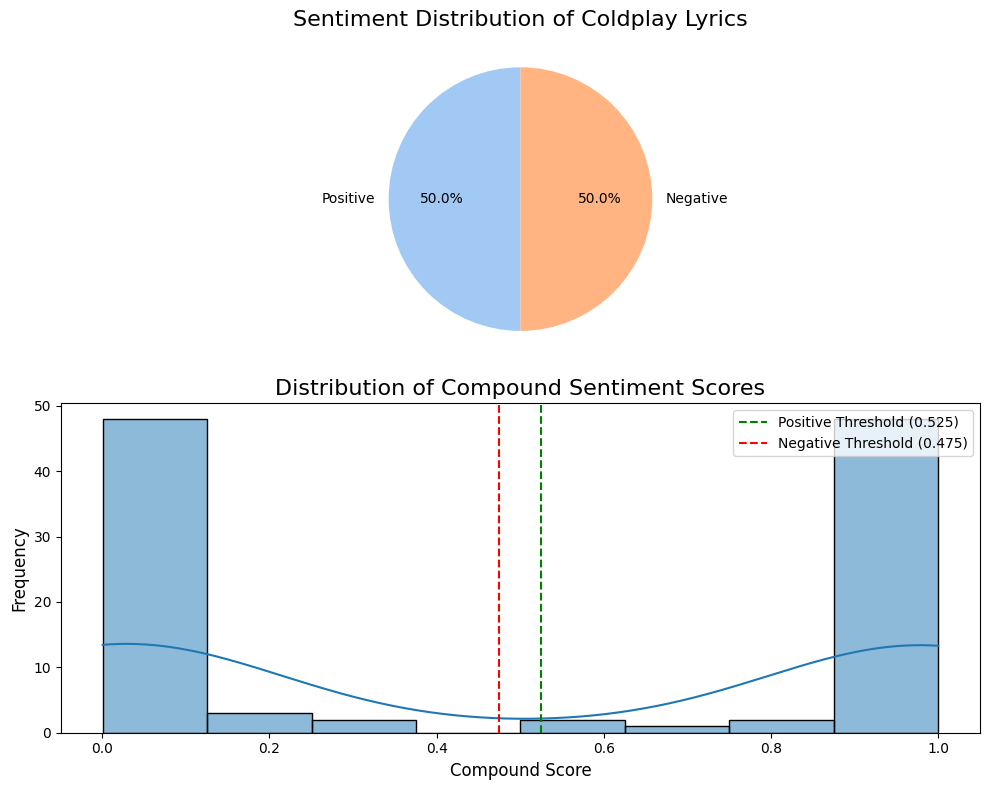

In [33]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 1. Sentiment Distribution (Pie Chart)
sentiment_counts = df['distilbert_sentiment_category'].value_counts()
colors = sns.color_palette('pastel')[0:3]
ax1.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sentiment Distribution of Coldplay Lyrics', fontsize=16)

# 2. Compound Score Distribution (Histogram)
sns.histplot(df['distilbert_sentiment'], kde=True, ax=ax2)
ax2.set_title('Distribution of Compound Sentiment Scores', fontsize=16)
ax2.set_xlabel('Compound Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

# Add vertical lines for sentiment thresholds
positive_threshold = 0.525
negative_threshold = 0.475
ax2.axvline(x=positive_threshold, color='g', linestyle='--', label='Positive Threshold (0.525)')
ax2.axvline(x=negative_threshold, color='r', linestyle='--', label='Negative Threshold (0.475)')
ax2.legend()

# Adjust layout and save the figure
plt.tight_layout()

#### Mean Sentiment by Album

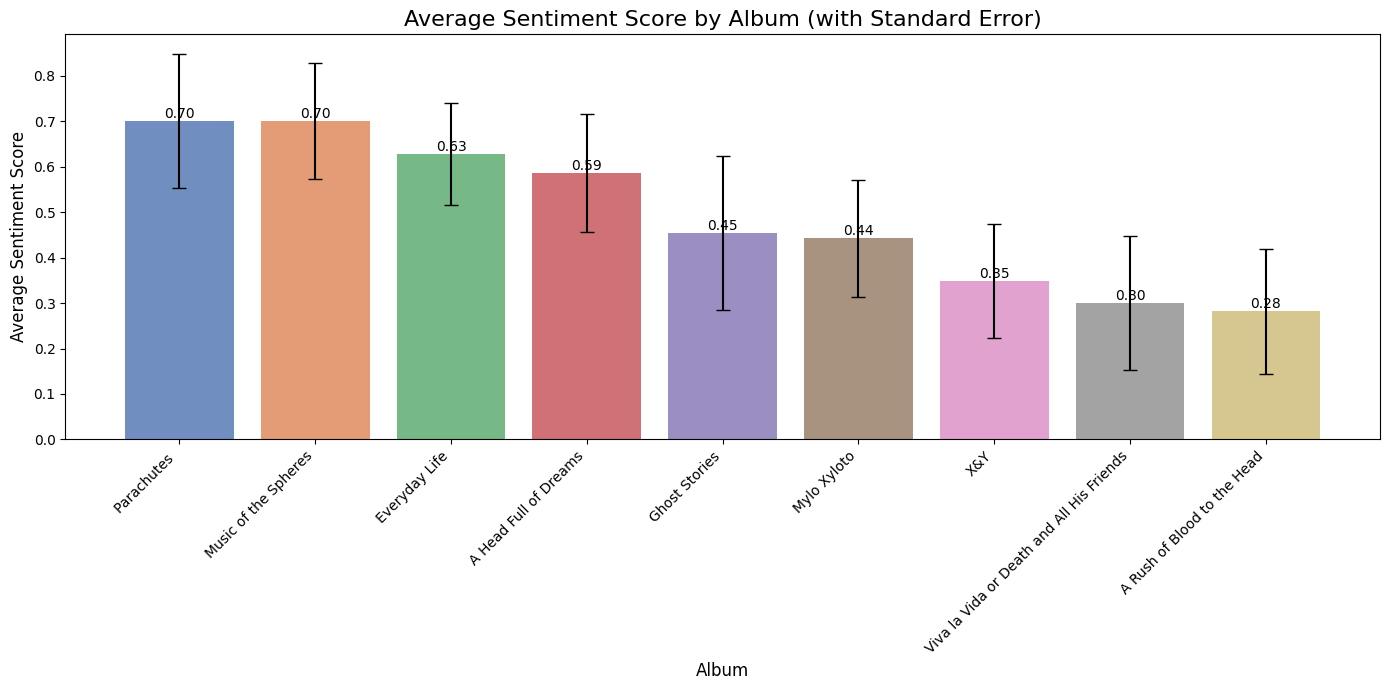

In [32]:
# Calculate mean and standard error for each album
album_stats = df.groupby('Album Name')['distilbert_sentiment'].agg(['mean', 'sem']).reset_index()
album_stats = album_stats.sort_values('mean', ascending=False)

plt.figure(figsize=(14, 7))
    
# Create bar plot
bars = plt.bar(album_stats['Album Name'], album_stats['mean'], yerr=album_stats['sem'], 
                   capsize=5, alpha=0.8, color=sns.color_palette("deep"))

plt.title('Average Sentiment Score by Album (with Standard Error)', fontsize=16)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

    
# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                 ha='center', va='bottom')
    
# Adjust layout to prevent cutting off labels
plt.tight_layout()

#### Mean Sentiment by Album over Time

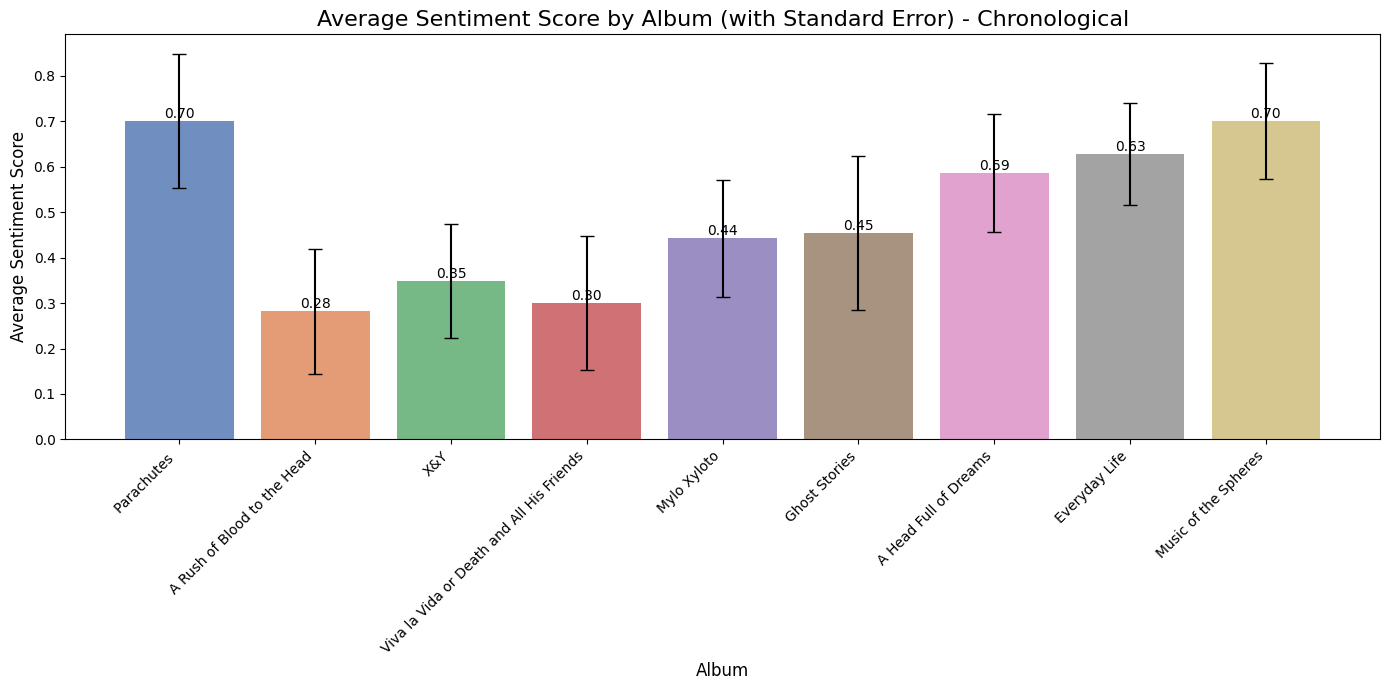

In [31]:
# Calculate mean and standard error for each album
album_stats = df.groupby(['Album Name', 'Album Release Date'])['distilbert_sentiment'].agg(['mean', 'sem']).reset_index()

# Sort by album release date
album_stats = album_stats.sort_values('Album Release Date')

plt.figure(figsize=(14, 7))
    
# Create bar plot
bars = plt.bar(album_stats['Album Name'], album_stats['mean'], yerr=album_stats['sem'], 
                   capsize=5, alpha=0.8, color=sns.color_palette("deep"))

plt.title('Average Sentiment Score by Album (with Standard Error) - Chronological', fontsize=16)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

    
# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                 ha='center', va='bottom')
    
# Adjust layout to prevent cutting off labels
plt.tight_layout()

### Conclusions and Comparison with LBSA

- The **distilBERT method** resulted in* much more polarized sentiment distribution* and **no neutral category** compared to LBSA method, ***a much more confident*** sentiment classification model.
- Tracks are divided *equally between positve and negative*.
- The distilBERT sentiment has a *normalized mean* of **0.49**, indicating neutral sentiment overall. 
- The **St. Deviation** is larger than LBSA method at **0.47**
- *Music of the Spheres* and *Parachutes* remain the **most positive sentiment** albums
- After *A Rush of Blood to the Head* there is a **smoother positive trend** in sentiment.

### Limitations of pre-trained models


1. **Context Length Limitation**:
   - Max token limit of 512 tokens can truncate longer texts, losing context.

2. **Complex Linguistic Structures**:
   - Struggles with sarcasm, irony, and nuanced sentiments.

3. **Domain Generalization**:
   - May not perform optimally on specific domains without fine-tuning.

4. **Sentiment Polarity and Strength**:
   - Does not naturally provide sentiment strength or polarity.

5. **Bias in Pre-trained Models**:
   - Inherits biases from training data, leading to potentially biased predictions.

6. **Resource Requirements**:
   - Requires significant computational resources for fine-tuning and inference.

7. **Limited Explainability**:
   - Operates as a "black box," making it hard to interpret predictions.

8. **Dependency on Pre-training Data Quality**:
   - Effectiveness depends on the quality and scope of pre-training data.


# Summary and Next Steps

In this notebook we performed sentiment analysis of coldplay lyrics using a lexicon-based approach and a pre-trained transformer model of the BERT family (distilBERT), with the purpose of classifying Coldplay players as positve or negative. 

The results in both cases are presented and visualized. In addition, we list the limitations and intricacies of each approach.

[Check out this video](https://www.youtube.com/watch?v=QpzMWQvxXWk) for improvements.

## Suggested Next Steps

1. Use techniques like LDA (Latent Dirichlet Allocation) to identify topics within the lyrics.
2. Use other rules-based methods such tf_idf (promising) to identify most important words or n-grams.
3. Use Aspect Based Sentiment Analysis to analyze specific themes/concepts.
4. Use larger song lyrics datasets to fine-tune pretrained transformer models for better performance with lyrics (Expensive?).
5. Explore emotion recognition, lyrics readability/complexity, 
6. Investigate the ***spotify API*** to add more information to our Coldplay dataset.